In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('D://USB-DS//E//winequality-red.csv')

In [28]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
df.describe(include = "all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


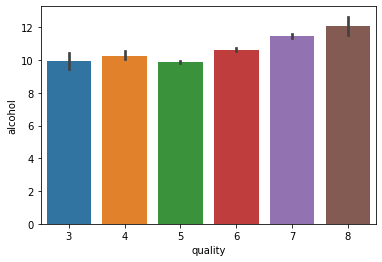

In [31]:
sns.barplot(x="quality", y="alcohol", data=df)
plt.show()

In [33]:
df.shape

(1599, 12)

In [32]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
wine_corr = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide']].corr()

wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000


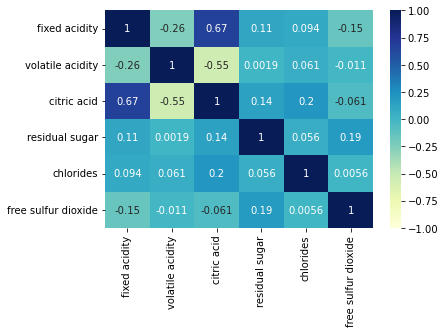

In [39]:
sns.heatmap(wine_corr, annot = True, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['citric acid'],axis=1), 
                                                    df['chlorides'], test_size=0.20, 
                                                    random_state=8)

In [53]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

100.0 %
